
📊 Classification report:

              precision    recall  f1-score   support

       False       0.70      0.78      0.74        50
        True       0.87      0.81      0.84        90

    accuracy                           0.80       140
   macro avg       0.78      0.80      0.79       140
weighted avg       0.81      0.80      0.80       140


🔍 Confusion matrix:


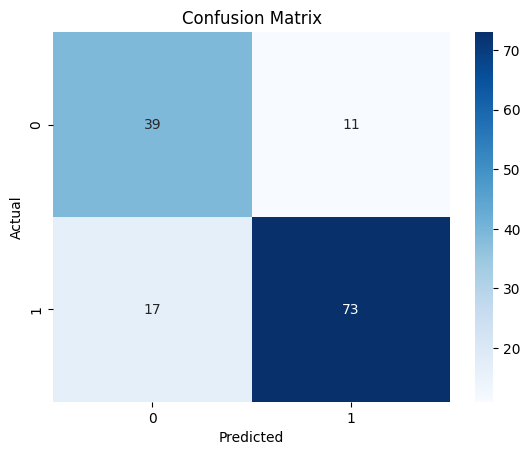


AUC Score: 0.8528888888888888


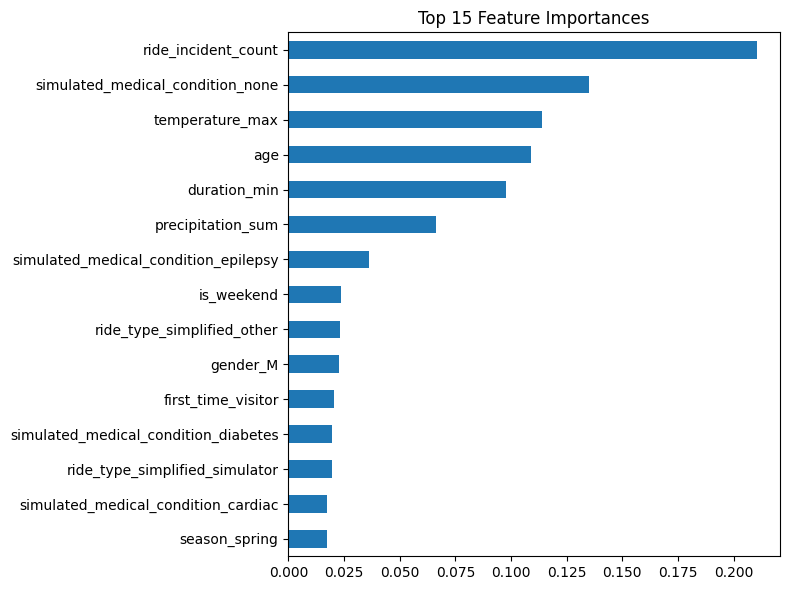

In [1]:
# notebooks/modeling/03_model_baseline.ipynb

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load train/test sets
from sklearn.model_selection import train_test_split

df = pd.read_parquet("../../data/processed/model_ready.parquet")
target = "incident_occurred"
df_model = pd.get_dummies(df[[
    # Ride features
    "ride_type_simplified", "ride_incident_count", "duration_min",
    # Visitor profile
    "age", "gender", "simulated_medical_condition", "first_time_visitor",
    # Temporal
    "season", "is_weekend",
    # Weather
    "temperature_max", "precipitation_sum",
    target
]], drop_first=True)

df_model = df_model.dropna()


X = df_model.drop(columns=target)
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Train random forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# 3. Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n📊 Classification report:\n")
print(classification_report(y_test, y_pred))

print("\n🔍 Confusion matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nAUC Score:", roc_auc_score(y_test, y_prob))

# 4. Feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(15).sort_values().plot(kind="barh", figsize=(8, 6))
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()
